# Problem 2 - Diabetes Sampling and Bootstrap

### a) Random sample of 25

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
df = pd.read_csv('../data_raw/diabetes.csv')
print("Raw shape:", df.shape)
df.head()

Raw shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Population Mean Glucose: 120.89 | Max Glucose: 199
Sample Mean Glucose: 116.64 | Max Glucose: 183


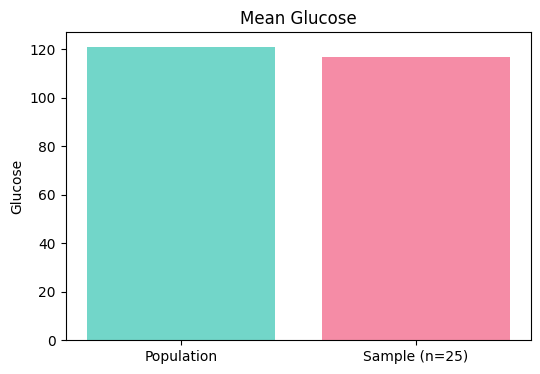

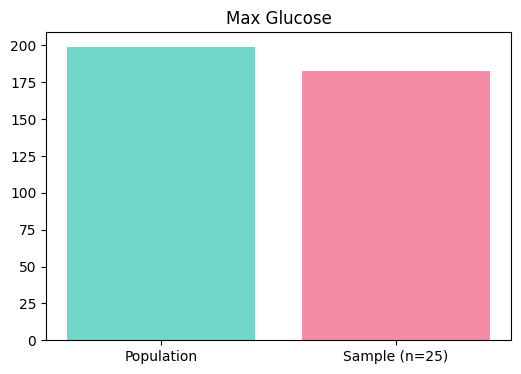

In [24]:
sample_25 = df.sample(25)

pop_mean_glu = df['Glucose'].mean()
pop_max_glu  = df['Glucose'].max()
samp_mean_glu = sample_25['Glucose'].mean()
samp_max_glu  = sample_25['Glucose'].max()

print(f"Population Mean Glucose: {pop_mean_glu:.2f} | Max Glucose: {pop_max_glu}")
print(f"Sample Mean Glucose: {samp_mean_glu:.2f} | Max Glucose: {samp_max_glu}")

plt.figure(figsize=(6,4))
plt.bar(['Population','Sample (n=25)'], [pop_mean_glu, samp_mean_glu], color=['#72D6C9','#F58CA6'])
plt.title('Mean Glucose')
plt.ylabel('Glucose')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(['Population','Sample (n=25)'], [pop_max_glu, samp_max_glu], color=['#72D6C9','#F58CA6'])
plt.title('Max Glucose')
plt.show()

### b) 98th percentile BMI

Population 98th percentile BMI: 47.53
Sample 98th percentile BMI: 40.25


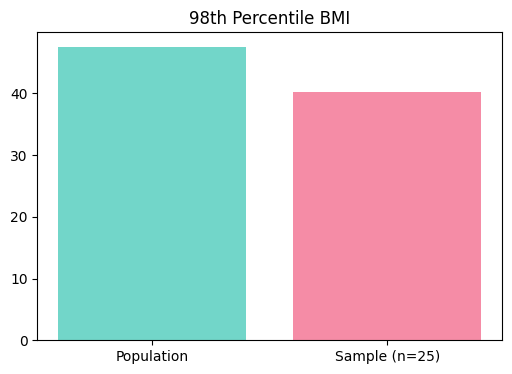

In [25]:
pop_bmi98 = np.percentile(df['BMI'], 98)
samp_bmi98 = np.percentile(sample_25['BMI'], 98)

print(f"Population 98th percentile BMI: {pop_bmi98:.2f}")
print(f"Sample 98th percentile BMI: {samp_bmi98:.2f}")

plt.figure(figsize=(6,4))
plt.bar(['Population','Sample (n=25)'], [pop_bmi98, samp_bmi98], color=['#72D6C9','#F58CA6'])
plt.title('98th Percentile BMI')
plt.show()

### c) Bootstrap 500 samples of 150 each – BloodPressure

Population Mean: 69.11 | Std: 19.36 | 98th Percentile: 99.32
Bootstrap Mean: 69.18 | Std: 19.08 | 98th Percentile: 97.92


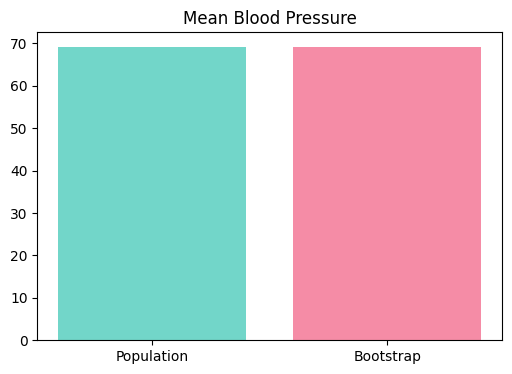

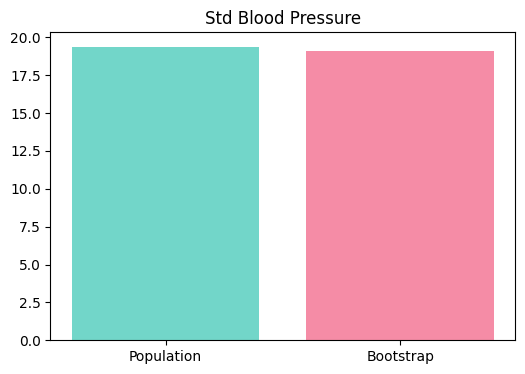

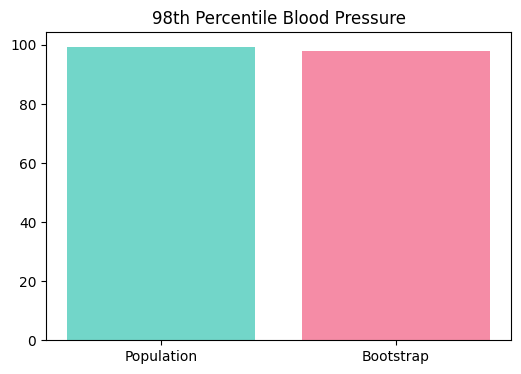

In [26]:
boot_means = []
boot_stds  = []
boot_98    = []

for i in range(500):
    boot = df.sample(150, replace=True)
    boot_means.append(boot['BloodPressure'].mean())
    boot_stds.append(boot['BloodPressure'].std())
    boot_98.append(np.percentile(boot['BloodPressure'], 98))

boot_avg_mean = np.mean(boot_means)
boot_avg_std  = np.mean(boot_stds)
boot_avg_98   = np.mean(boot_98)

pop_mean = df['BloodPressure'].mean()
pop_std  = df['BloodPressure'].std()
pop_98   = np.percentile(df['BloodPressure'], 98)

print(f"Population Mean: {pop_mean:.2f} | Std: {pop_std:.2f} | 98th Percentile: {pop_98:.2f}")
print(f"Bootstrap Mean: {boot_avg_mean:.2f} | Std: {boot_avg_std:.2f} | 98th Percentile: {boot_avg_98:.2f}")

# save table
table = f"""| Statistic           | Population | Bootstrap Average |
|---------------------|------------|-------------------|
| Mean Blood Pressure | {pop_mean:.2f}      | {boot_avg_mean:.2f}             |
| Std Blood Pressure  | {pop_std:.2f}      | {boot_avg_std:.2f}             |
| 98th percentile     | {pop_98:.2f}      | {boot_avg_98:.2f}             |"""

with open('../reports/bootstrap_summary.md', 'w') as f:
    f.write(table)

# charts
plt.figure(figsize=(6,4))
plt.bar(['Population','Bootstrap'], [pop_mean, boot_avg_mean], color=['#72D6C9','#F58CA6'])
plt.title('Mean Blood Pressure')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(['Population','Bootstrap'], [pop_std, boot_avg_std], color=['#72D6C9','#F58CA6'])
plt.title('Std Blood Pressure')
plt.show()

plt.figure(figsize=(6,4))
plt.bar(['Population','Bootstrap'], [pop_98, boot_avg_98], color=['#72D6C9','#F58CA6'])
plt.title('98th Percentile Blood Pressure')
plt.show()